In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Exercise M6.03
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0, test_size=0.5
)


In [9]:
# simple gradient boosting tree
# Specify tree max_depth and learning rate

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(
    n_estimators=100, 
    random_state=0, 
    max_depth=3, 
    learning_rate=0.1,)

In [10]:
# Build a fully grown random forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(
    n_estimators=100,
    random_state=0,
    max_depth=None,
    n_jobs=-1
)

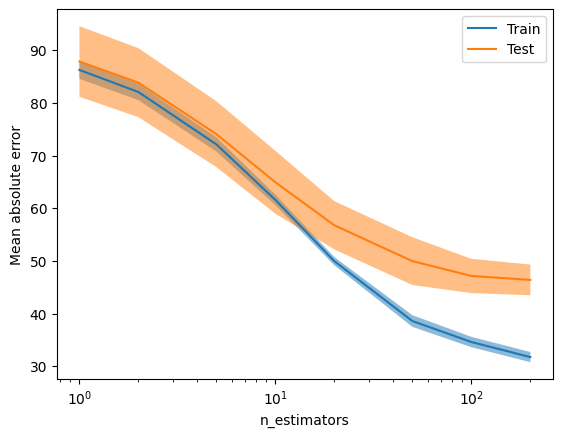

In [ ]:
# Create a validation curve, number of trees on performance - GBR
from sklearn.model_selection import ValidationCurveDisplay

param_range = np.array([1, 2, 5, 10, 20, 50, 100, 200])

disp = ValidationCurveDisplay.from_estimator(
    gbr, data, target,
    param_name='n_estimators',
    param_range=param_range,
    cv=5,
    scoring='neg_mean_absolute_error',
    negate_score=True,
    n_jobs=-1
)

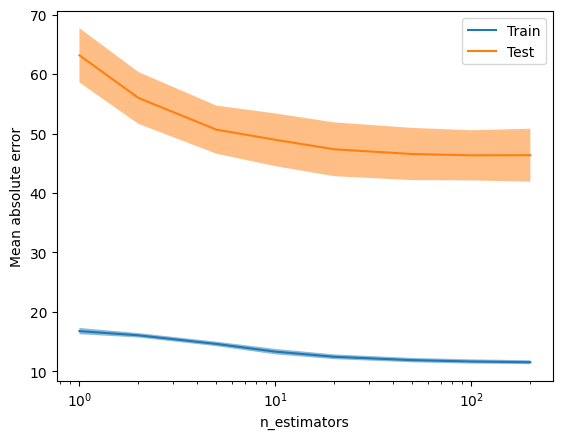

In [14]:
# Create a validation curve, number of trees on performance - RFR
from sklearn.model_selection import ValidationCurveDisplay

param_range = np.array([1, 2, 5, 10, 20, 50, 100, 200])

disp = ValidationCurveDisplay.from_estimator(
    rfr, data, target,
    param_name='n_estimators',
    param_range=param_range,
    cv=5,
    scoring='neg_mean_absolute_error',
    negate_score=True,
    n_jobs=-1
)

In [19]:
# Adding an early stopping to gbr
gbr = GradientBoostingRegressor(
    n_estimators=1_100, 
    random_state=0, 
    max_depth=3, 
    learning_rate=0.1,
    n_iter_no_change=5
)

In [20]:
# assess new gbr performance using data_test and target_test  
gbr.fit(data_train, target_train)
gbr_score = gbr.score(data_test, target_test)
print(f"GBR test score with early stopping: {gbr_score:.3f}")

GBR test score with early stopping: 0.798


In [21]:
gbr.n_estimators_

191

In [22]:
# Histogram boosting
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [37]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(n_estimators=200)
cv_results_gbm = cross_validate(
    gbm, data, target, scoring='neg_mean_absolute_error', n_jobs=-1
)
cv_results_gbm['test_score'].mean() * -1, cv_results_gbm['test_score'].std()
cv_results_gbm['fit_time'].mean(), cv_results_gbm['score_time'].mean()

(np.float64(6.509457635879516), np.float64(0.007867097854614258))

In [29]:
# Manually binning features for histogram-based gradient boosting
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(
    n_bins=256, encode='ordinal', strategy='quantile'
)
data_trans = discretizer.fit_transform(data)
len(data_trans)

c:\ESL\Learning\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
c:\ESL\Learning\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\ESL\Learning\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:397: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\ESL\Learning\.venv\Lib\site-packages\sklearn\preprocessing\_discretization.py:397: UserWarning: Bins whose width are too small 

20640

In [31]:
data_trans

array([[249.,  39., 231., ...,  83., 162.,  30.],
       [248.,  19., 203., ...,  28., 161.,  30.],
       [242.,  49., 249., ..., 125., 160.,  29.],
       ...,
       [ 17.,  15., 126., ...,  49., 200.,  82.],
       [ 23.,  16., 136., ...,  29., 200.,  77.],
       [ 53.,  14., 130., ...,  93., 199.,  81.]])

In [35]:
[len(np.unique(i)) for i in data_trans.T]

[256, 50, 256, 253, 256, 256, 207, 235]

In [ ]:
from sklearn.pipeline import make_pipeline

gmb_pipeline = make_pipeline(
    discretizer, GradientBoostingRegressor(n_estimators=200)
)
cv_results_gbm_pipe = cross_validate(
    gmb_pipeline, data, target, scoring='neg_mean_absolute_error', n_jobs=-1
)
print(f"{cv_results_gbm_pipe['test_score'].mean() * -1}, {cv_results_gbm_pipe['test_score'].std()}")
print(f"{cv_results_gbm_pipe['fit_time'].mean()}, {cv_results_gbm_pipe['score_time'].mean()}")

(np.float64(3.420509672164917), np.float64(0.009094524383544921))

In [41]:
from sklearn.ensemble import HistGradientBoostingRegressor
hgbm = HistGradientBoostingRegressor(max_iter=200, random_state=0)
cv_results_hgbm = cross_validate(
    hgbm, data, target, scoring='neg_mean_absolute_error', n_jobs=-1
)
print(f"{cv_results_hgbm['test_score'].mean() * -1}, {cv_results_hgbm['test_score'].std()}")
print(f"{cv_results_hgbm['fit_time'].mean()}, {cv_results_hgbm['score_time'].mean()}")

43.75789403636745, 2.69445299316747
0.4797360897064209, 0.06067724227905273


In [47]:
data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)

In [52]:
# Tune hyperparameters for random forest model
from sklearn.model_selection import RandomizedSearchCV

param_distribution = {
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [10, 100, 1000, None],
    'min_samples_leaf': [1, 2, 5, 10, 20, 50, 100],
}
search_cv = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=0),
    param_distributions=param_distribution,
    scoring='neg_mean_absolute_error',
    n_iter=10,
    n_jobs=-1,
    random_state=0
)
search_cv.fit(data_train, target_train)
search_cv.best_params_

{'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': 'log2'}

In [53]:
# Put the results in a DataFrame
columns = [f'param_{i}' for i in param_distribution.keys()]
columns += ['mean_test_score', 'std_test_score']
results = pd.DataFrame(search_cv.cv_results_)[columns]
results['mean_test_score'] *= -1
results.sort_values('mean_test_score')


,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,mean_test_score,std_test_score
3,log2,None,2,33.205324,0.420353
2,log2,1000,2,33.840936,0.330200
4,sqrt,None,2,34.031652,0.469439
5,log2,None,50,40.975881,0.626801
1,log2,100,50,41.121409,0.593805
9,sqrt,100,2,41.841874,0.521396
8,sqrt,None,50,42.727189,0.648609
7,None,10,1,54.649518,0.881797
0,log2,10,5,55.085987,0.756296
6,sqrt,10,5,57.579051,0.775891


In [55]:
# performance of the best estimator on the test set
error_test = -search_cv.score(data_test, target_test)
error_test

32.93724049755225

In [56]:
# Tune a Histogram-based gradient boosting model
from scipy.stats import loguniform
param_distribution = {
    'max_iter': [3, 10, 30, 100, 300, 1000],
    'learning_rate': loguniform(0.01, 1),
    'max_leaf_nodes': [2, 5, 10, 20, 50, 100],
}
search_cv = RandomizedSearchCV(
    HistGradientBoostingRegressor(),
    param_distributions=param_distribution,
    scoring='neg_mean_absolute_error',
    n_iter=20,
    n_jobs=-1,
    random_state=0
)
search_cv.fit(data_train, target_train)
search_cv.best_params_


{'learning_rate': np.float64(0.0186395896357306),
 'max_iter': 300,
 'max_leaf_nodes': 100}

In [57]:
# Put the results in a DataFrame
columns = [f'param_{i}' for i in param_distribution.keys()]
columns += ['mean_test_score', 'std_test_score']
results = pd.DataFrame(search_cv.cv_results_)[columns]
results['mean_test_score'] *= -1
results.sort_values('mean_test_score')

,param_max_iter,param_learning_rate,param_max_leaf_nodes,mean_test_score,std_test_score
14,300,0.018640,100,31.035551,0.283599
6,300,0.047293,20,31.870937,0.239592
2,30,0.176656,50,32.625889,0.139410
13,300,0.297739,10,32.667505,0.647891
9,100,0.083745,20,33.217223,0.402968
19,100,0.215543,10,33.315457,0.441044
12,100,0.067503,20,33.786277,0.510872
16,300,0.059290,5,35.822588,0.344123
1,100,0.160519,5,36.179076,0.445124
0,1000,0.125207,2,40.908645,0.647849


In [58]:
error_test = -search_cv.score(data_test, target_test)
error_test

30.42027573575932

In [59]:
# Exercise M6.04
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$

In [60]:
# Fit a histogram-based gradient boosting model with large max_iter and early stopping
from sklearn.ensemble import HistGradientBoostingRegressor
gbm = HistGradientBoostingRegressor(
    max_iter=1_000,
    early_stopping=True,
    n_iter_no_change=10,
    random_state=0
)
gbm.fit(data, target)
gbm.n_iter_

180

In [63]:
# Grid search for hyperparameter tuning with early stopping
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 8],
    'max_leaf_nodes': [15, 31],
    'learning_rate': [0.01, 0.1, 1.0]
}
search_cv = GridSearchCV(
    gbm,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)
search_cv.fit(data, target)
search_cv.best_params_


{'learning_rate': 0.01, 'max_depth': 8, 'max_leaf_nodes': 31}

In [70]:
# Nested cross-validation to better estimate generalization performance
from sklearn.model_selection import cross_validate
cv_results_gbm = cross_validate(
    search_cv, data, target, scoring='neg_mean_absolute_error', n_jobs=-1,
    return_estimator=True
)
cv_results_gbm['test_score'].mean() * -1, cv_results_gbm['test_score'].std()

(np.float64(43.822217288798285), np.float64(2.974999351268488))

In [71]:
# Find the best parameters from the nested CV
search_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 8, 'max_leaf_nodes': 31}

In [72]:
cv_results_gbm

{'fit_time': array([51.64812684, 51.12297273, 52.98203301, 51.81062055, 52.45327973]),
 'score_time': array([0.10361528, 0.10663462, 0.30235338, 0.0742209 , 0.09924197]),
 'estimator': [GridSearchCV(estimator=HistGradientBoostingRegressor(early_stopping=True,
                                                       max_iter=1000,
                                                       random_state=0),
               n_jobs=-1,
               param_grid={'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [3, 8],
                           'max_leaf_nodes': [15, 31]},
               scoring='neg_mean_absolute_error'),
  GridSearchCV(estimator=HistGradientBoostingRegressor(early_stopping=True,
                                                       max_iter=1000,
                                                       random_state=0),
               n_jobs=-1,
               param_grid={'learning_rate': [0.01, 0.1, 1.0], 'max_depth': [3, 8],
                           'max_leaf_nodes': [15, 31]},

In [73]:
# Examine the results of the inner cross-validation for each estimator of the outer cv
for estimator in cv_results_gbm['estimator']:
    df = pd.DataFrame(estimator.cv_results_)
    df['mean_test_score'] *= -1
    print(df[['param_max_depth', 'param_max_leaf_nodes', 'param_learning_rate', 'mean_test_score']].sort_values('mean_test_score').head(3))


   param_max_depth  param_max_leaf_nodes  param_learning_rate  mean_test_score
6                8                    15                 0.10        45.876057
3                8                    31                 0.01        45.974732
7                8                    31                 0.10        46.791019
   param_max_depth  param_max_leaf_nodes  param_learning_rate  mean_test_score
6                8                    15                 0.10        46.414459
3                8                    31                 0.01        46.702578
7                8                    31                 0.10        46.860874
   param_max_depth  param_max_leaf_nodes  param_learning_rate  mean_test_score
3                8                    31                 0.01        46.229451
6                8                    15                 0.10        46.525493
7                8                    31                 0.10        46.571883
   param_max_depth  param_max_leaf_nodes  param_lear

In [74]:
# Modeul 6 Wrap-up Quiz 
import pandas as pd

dataset = pd.read_csv("data/penguins.csv")

feature_names = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)",
    "Flipper Length (mm)",
]
target_name = "Body Mass (g)"

dataset = dataset[feature_names + [target_name]].dropna(axis="rows", how="any")
dataset = dataset.sample(frac=1, random_state=0).reset_index(drop=True)
data, target = dataset[feature_names], dataset[target_name]

In [75]:
# Fit a decision tree regressor and a random forest regressor with default hyperparameters
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

tree = DecisionTreeRegressor(random_state=0)
forest = RandomForestRegressor(random_state=0)

# Evaluate both models using 10-fold cv and negative mean absolute error
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree, data, target, cv=10, scoring="neg_mean_absolute_error")
forest_scores = cross_val_score(forest, data, target, cv=10, scoring="neg_mean_absolute_error")

# put the scores in a DataFrame for easier comparison
results = pd.DataFrame({
    "Decision Tree": -tree_scores,
    "Random Forest": -forest_scores
})
results['difference'] = results['Decision Tree'] - results['Random Forest']
results

,Decision Tree,Random Forest,difference
0,380.000000,276.928571,103.071429
1,352.142857,285.007143,67.135714
2,354.411765,224.433824,129.977941
3,330.882353,283.375000,47.507353
4,447.058824,341.117647,105.941176
5,335.294118,255.963235,79.330882
6,408.823529,265.647059,143.176471
7,417.647059,282.294118,135.352941
8,431.617647,321.970588,109.647059
9,407.352941,236.161765,171.191176


In [76]:
# Build two alternative random forests with 5 and 100 trees, respectively
forest_5 = RandomForestRegressor(n_estimators=5, random_state=0)
forest_100 = RandomForestRegressor(n_estimators=100, random_state=0)

# Evaluate both models using 10-fold cv and negative mean absolute error
from sklearn.model_selection import cross_val_score
scores_5 = cross_val_score(forest_5, data, target, cv=10, scoring="neg_mean_absolute_error")
scores_100 = cross_val_score(forest_100, data, target, cv=10, scoring="neg_mean_absolute_error")

results = pd.DataFrame({
    "Forest 5 trees": -scores_5,
    "Forest 100 trees": -scores_100
})

results['difference'] = results['Forest 5 trees'] - results['Forest 100 trees']
results


,Forest 5 trees,Forest 100 trees,difference
0,287.428571,276.928571,10.500000
1,323.571429,285.007143,38.564286
2,247.205882,224.433824,22.772059
3,305.147059,283.375000,21.772059
4,334.117647,341.117647,-7.000000
5,250.147059,255.963235,-5.816176
6,285.735294,265.647059,20.088235
7,353.529412,282.294118,71.235294
8,307.058824,321.970588,-14.911765
9,271.323529,236.161765,35.161765


Text(0, 0.5, 'Negative Mean Absolute Error')

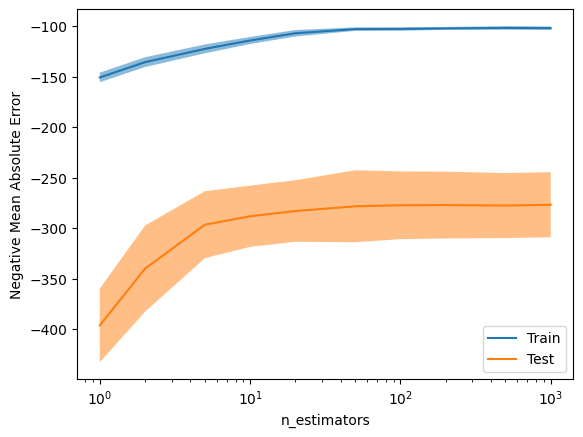

In [83]:
# Plot the validation curve of the n_estimators
import numpy as np
n_estimators = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000])
from sklearn.model_selection import ValidationCurveDisplay

disp = ValidationCurveDisplay.from_estimator(
    RandomForestRegressor(random_state=0),
    param_name="n_estimators",
    param_range=n_estimators,
    X=data,
    y=target,
    cv=10,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
)
disp.ax_.set_ylabel("Negative Mean Absolute Error")

Text(0, 0.5, 'Negative Mean Absolute Error')

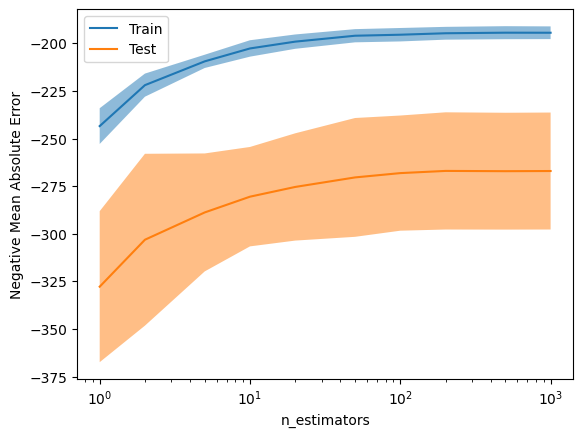

In [84]:
disp = ValidationCurveDisplay.from_estimator(
    RandomForestRegressor(max_depth=5, random_state=0),
    param_name="n_estimators",
    param_range=n_estimators,
    X=data,
    y=target,
    cv=10,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
)
disp.ax_.set_ylabel("Negative Mean Absolute Error")

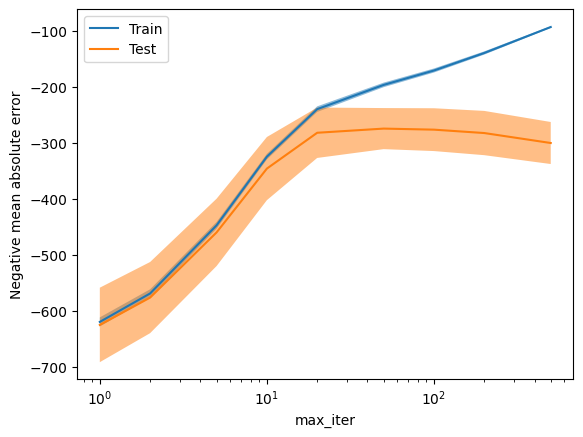

In [85]:
# Build a validation curve for HisGradientBoostingRegressor by varying max_iter
from sklearn.ensemble import HistGradientBoostingRegressor
max_iter = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])
disp = ValidationCurveDisplay.from_estimator(
    HistGradientBoostingRegressor(random_state=0),
    param_name="max_iter",
    param_range=max_iter,
    X=data,
    y=target,
    cv=10,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
)